## Image Classifier (Fashion MNIST)

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

#### Loading the data 

In [4]:
fashion_mnist = keras.datasets.fashion_mnist

In [5]:
(X_train_full,y_train_full),(x_test,y_test) = fashion_mnist.load_data()

#### Looking at data

In [7]:
X_train_full.shape

(60000, 28, 28)

In [8]:
X_train_full.dtype

dtype('uint8')

In [9]:
X_train_full

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [10]:
y_train_full

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

#### Creating validaton set and scaling the input features

In [12]:
X_valid,X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0

In [13]:
y_valid,y_train = y_train_full[:5000],y_train_full[5000:]

#### We need Class names

In [15]:
class_names = ["T-shirt/Top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle Boot"]

In [16]:
class_names[y_valid[0]],class_names[y_train[0]]

('Ankle Boot', 'Coat')

#### Creating model with sequential api

In [18]:
model = keras.models.Sequential()

In [19]:
model.add(keras.layers.Flatten(input_shape=[28,28]))

C:\Users\mannr\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
model.add(keras.layers.Dense(300,activation="relu"))

In [21]:
model.add(keras.layers.Dense(100,activation="relu"))

In [22]:
model.add(keras.layers.Dense(10,activation="softmax"))

In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [25]:
hidden1 = model.layers[1]

In [26]:
weights,biases = hidden1.get_weights()

In [27]:
weights

array([[ 0.01885497,  0.00313006,  0.06131992, ...,  0.07085501,
         0.01092616,  0.03289875],
       [ 0.01577002, -0.04395013,  0.04870733, ..., -0.06732152,
         0.04241008,  0.0344901 ],
       [ 0.05407315,  0.05172136,  0.02096047, ...,  0.02225604,
         0.0007063 , -0.06958044],
       ...,
       [-0.05580841,  0.0246935 ,  0.02691522, ...,  0.05479778,
         0.02374022,  0.0630419 ],
       [ 0.03607833,  0.01455132,  0.06436114, ...,  0.02754927,
         0.05802806,  0.06177348],
       [ 0.04416174, -0.03337675,  0.02990535, ..., -0.0043105 ,
        -0.0147154 , -0.05658083]], dtype=float32)

In [28]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [29]:
weights.shape

(784, 300)

In [30]:
biases.shape

(300,)

#### Compile the model

In [32]:
model.compile(loss = "sparse_categorical_crossentropy",optimizer = "sgd",metrics = ["accuracy"])

#### Training and Evaluating the model

In [34]:
history = model.fit(X_train,y_train,epochs = 40, validation_data=(X_valid,y_valid))

Epoch 1/40
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6718 - loss: 1.0311 - val_accuracy: 0.8340 - val_loss: 0.5064
Epoch 2/40
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8227 - loss: 0.5094 - val_accuracy: 0.8520 - val_loss: 0.4390
Epoch 3/40
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8435 - loss: 0.4511 - val_accuracy: 0.8534 - val_loss: 0.4281
Epoch 4/40
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8517 - loss: 0.4199 - val_accuracy: 0.8600 - val_loss: 0.4026
Epoch 5/40
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8602 - loss: 0.3972 - val_accuracy: 0.8676 - val_loss: 0.3811
Epoch 6/40
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8644 - loss: 0.3840 - val_accuracy: 0.8654 - val_loss: 0.3913
Epoch 7/40
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8685 - loss: 0.3701 - val_accuracy: 0.8692 - val_loss: 0.3684
Epoch 8/40
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8720 - loss: 0.3636 - 

#### Plotting a graph

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

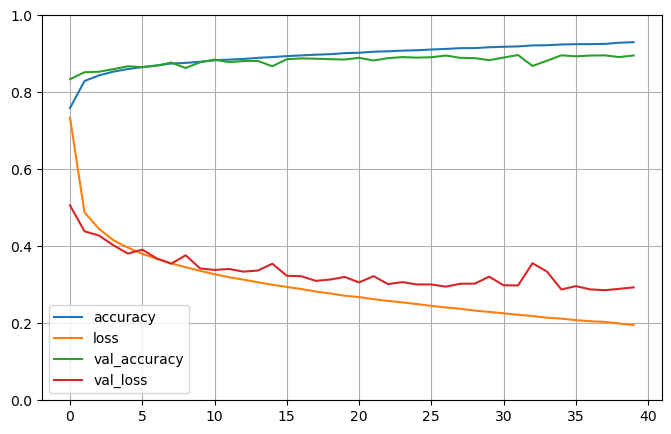

In [39]:
pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [40]:
model.evaluate(x_test/255.0,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8827 - loss: 0.3310


[0.3248806595802307, 0.8848999738693237]

#### Make Predictions

In [42]:
X_new = x_test[:3]

In [43]:
predictions = model.predict(X_new)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


In [44]:
predictions

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [45]:
y_test[:3]

array([9, 2, 1], dtype=uint8)

#### The predictions were correct